In [2]:
import numpy as np
from hipposlam.utils import read_pickle
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
import os
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
from matplotlib import cm
from tqdm import tqdm

In [3]:
project_tag = 'Avoidance'
data_dir = join('data', project_tag)
plot_dir = join('plots', project_tag, 'firing_fields')
os.makedirs(plot_dir, exist_ok=True)
trajdata = read_pickle(join(data_dir, 'traj.pickle'))
metadata = read_pickle(join(data_dir, 'meta.pickle'))
stored_f = metadata['stored_f']
f_pos = metadata['fpos']


trajdf = pd.DataFrame(trajdata)
trajdf['X_Nrow'] = trajdf['X'].apply(lambda x : x.shape[0])
trajdf['a'] = trajdf['rota'] * trajdf['rotz']
print('Max x row ', trajdf['X_Nrow'].max())
trajdf



Max x row  196


,t,x,y,z,rotx,roty,rotz,rota,objID,objID_dist,f_sigma,X,X_Nrow,a
0,128,4.680020,2.807367,0.061624,-1.579231e-03,-0.001579,-0.999998,1.570826,[],[],{},[],0,-1.570822
1,256,4.678977,2.754858,0.058151,-1.903525e-03,-0.001798,-0.999997,1.580309,"[2640, 5543, 15573, 15699, 17158]","[2640_2, 5543_1, 15573_2, 15699_1, 17158_1]","{'2640_2': [1], '5543_1': [1], '15573_2': [1],...","[[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",5,-1.580304
2,384,4.678577,2.701075,0.058773,-7.499675e-04,-0.000738,-0.999999,1.594632,"[2640, 5543, 15573, 15699, 17158]","[2640_2, 5543_1, 15573_2, 15699_1, 17158_1]","{'2640_2': [2], '5543_1': [2], '15573_2': [2],...","[[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [...",5,-1.594631
3,512,4.678619,2.646312,0.059026,-3.263218e-04,-0.000293,-1.000000,1.613886,"[2640, 2717, 5543, 15573, 17158]","[2640_2, 2717_1, 5543_1, 15573_2, 17158_1]","{'2640_2': [3], '5543_1': [3], '15573_2': [3],...","[[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [...",6,-1.613886
4,640,4.677918,2.591286,0.059130,-1.425992e-04,-0.000069,-1.000000,1.635931,"[1632, 1856, 2640, 2717, 5543, 15573, 17158]","[1632_2, 1856_2, 2640_2, 2717_1, 5543_1, 15573...","{'2640_2': [4], '5543_1': [4], '15573_2': [4],...","[[0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [...",8,-1.635931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15338,1968384,4.108388,-0.634866,0.059201,-2.580587e-04,0.000066,-1.000000,-0.396684,"[1856, 5543, 14472, 15573, 15615, 15797]","[1856_1, 5543_1, 14472_1, 15573_1, 15615_1, 15...","{'2640_2': [], '5543_1': [], '15573_2': [], '1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",196,0.396684
15339,1968512,4.156990,-0.614649,0.059201,-2.533233e-04,0.000073,-1.000000,-0.403152,"[1856, 5543, 14472, 15573, 15615, 15797]","[1856_1, 5543_1, 14472_1, 15573_1, 15615_1, 15...","{'2640_2': [], '5543_1': [], '15573_2': [], '1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",196,0.403152
15340,1968640,4.205974,-0.593832,0.059201,-1.015182e-04,0.000090,-1.000000,-0.398917,"[1856, 5543, 14472, 15573, 15615, 15797]","[1856_1, 5543_1, 14472_1, 15573_1, 15615_1, 15...","{'2640_2': [], '5543_1': [], '15573_2': [], '1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",196,0.398917
15341,1968768,4.256237,-0.573071,0.059201,5.461929e-07,0.000191,-1.000000,-0.393958,"[1856, 5543, 14472, 15573, 15615, 15797]","[1856_1, 5543_1, 14472_1, 15573_1, 15615_1, 15...","{'2640_2': [], '5543_1': [], '15573_2': [], '1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",196,0.393958


In [14]:
y = trajdf[['x', 'y']].to_numpy()

Xncols = trajdf['X'][0].shape[1]
Xnrows = trajdf['X_Nrow'].max()

Xinput = np.zeros((trajdf.shape[0], Xnrows* Xncols))

for i in range(trajdf.shape[0]):
    Xfull = np.zeros((Xnrows, Xncols))
    X_each = trajdf['X'][i]
    Xfull[:X_each.shape[0], :] = X_each.copy()

    Xinput[i, :] = Xfull.flatten()


print('Xinput shape = ', Xinput.shape)
print('y shape = ', y.shape)


Xinput shape =  (15343, 2744)
y shape =  (15343, 2)


In [15]:
model = LinearRegression()

model.fit(Xinput, y)



LinearRegression()

In [16]:
ypred = model.predict(Xinput)



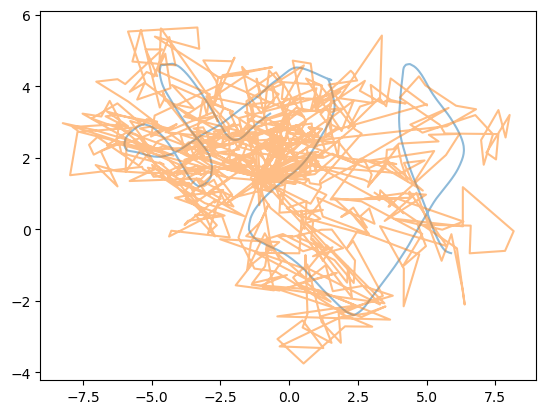

In [20]:
id1, id2 = 1000, 2000
plt.plot(y[id1:id2, 0], y[id1:id2, 1], alpha=0.5)
plt.plot(ypred[id1:id2, 0], ypred[id1:id2, 1], alpha=0.5)

(array([100., 316., 507., 661., 786., 881., 947., 957., 927., 904., 828.,
        795., 743., 697., 639., 521., 515., 392., 404., 360., 327., 245.,
        238., 182., 210., 151., 143., 106., 117., 114., 116.,  86.,  66.,
         49.,  48.,  59.,  38.,  41.,  38.,  35.,  30.,  20.,   0.,   3.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.00976855, 0.19988403, 0.38999951, 0.580115  , 0.77023048,
        0.96034596, 1.15046145, 1.34057693, 1.53069241, 1.72080789,
        1.91092338, 2.10103886, 2.29115434, 2.48126982, 2.67138531,
        2.86150079, 3.05161627, 3.24173175, 3.43184724, 3.62196272,
        3.8120782 , 4.00219369, 4.19230917, 4.38242465, 4.57254013,
        4.76265562, 4.9527711 , 5.14288658, 5.33300206, 5.52311755,
        5.71323303, 5.90334851, 6.09346399, 6.28357948, 6.47369496,
        6.66381044, 6.85392593, 7.04404141, 7.23415689, 7.42427237,
        7.61438786, 7.80450334, 7.99461882, 8.1847343 , 8.37484979,
        8.56496527, 8.75508075, 8.94519623, 9.

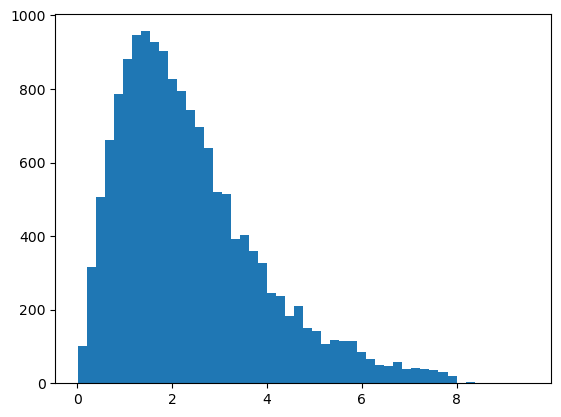

In [19]:
mse = np.sqrt(np.sum(np.square(ypred - y), axis=1))
plt.hist(mse, bins=50)